# Assignment 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Health Analytics
- Course ID: BDA700NAA.05841.2247
- Data Source: 
    - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/code
    - https://github.com/kamilpytlak/data-science-projects/tree/main/heart-disease-prediction/2022

## Goal: 
 Develop a model to predict the heart disease ("HadHeartAttack") based on the other variables.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# load data
df = pd.read_csv('heart_2022_with_nans.csv')
# columns
print("Columns: \n", df.columns)
# first 5 observations
df.head()

Columns: 
 Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Data Cleaning

In [3]:
# Remove null data
df = df.dropna().reset_index(drop=True)
# Check for null data for each column
print("Null data: \n", df.isnull().sum())
# Check the entire null data
print("Null data: \n", df.isnull().sum().sum())

Null data: 
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
# Labeling data

# GeneralHealth; ordering data
dict1 = {'Excellent': 5, 'Very good': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}
# LastCheckupTime; ordering data
dict2 = {
    'Within past year (anytime less than 12 months ago)': 1, 
    'Within past 2 years (1 year but less than 2 years ago)': 2, 
    'Within past 5 years (2 years but less than 5 years ago)': 3,
    '5 or more years ago': 4
    }
# RemovedTeeth: ordering data
dict3 = {'None of them': 1, '1 to 5': 2, '6 or more, but not all': 3, 'All of them': 4}
# HadDiabetes: binary data
dict4 = {'No, pre-diabetes or borderline diabetes': 'Yes', 'Yes, but only during pregnancy (female)': 'No'}
# SmokerStatus: ordering data
dict5 = {'Never smoked': 1, 'Former smoker': 2, 'Current smoker - now smokes some days': 3, 'Current smoker - now smokes every day': 4}
# ECigaretteUsage: ordering data
dict6 = {
    'Never used e-cigarettes in my entire life': 1,
    'Not at all (right now)': 2,
    'Use them some days': 3,
    'Use them every day': 4
}
# AgeCategory: ordering data
dict7 = {
    'Age 18 to 24': 1,
    'Age 25 to 29': 2,
    'Age 30 to 34': 3,
    'Age 35 to 39': 4,
    'Age 40 to 44': 5,
    'Age 45 to 49': 6,
    'Age 50 to 54': 7,
    'Age 55 to 59': 8,
    'Age 60 to 64': 9,
    'Age 65 to 69': 10,
    'Age 70 to 74': 11,
    'Age 75 to 79': 12,
    'Age 80 or older': 13
}
# TetanusLast10Tdap: binary data
dict8 = {
    'No, did not receive any tetanus shot in the past 10 years': 'No',
    'Yes, received tetanus shot but not sure what type': 'Yes',
    'Yes, received Tdap': 'Yes',
    'Yes, received tetanus shot, but not Tdap': 'Yes'
}
# CovidPos: binary data
dict9 = {'Tested positive using home test without a health professional': 'Yes'}

# RemovedTeeth: ordering data
dict10 = {'None of them': 1, '1 to 5': 2, '6 or more, but not all': 3, 'All': 4}


# mapping defined dictionaries to the dataframe
df['GeneralHealth'] = df['GeneralHealth'].map(dict1).fillna(df['GeneralHealth'])
df['LastCheckupTime'] = df['LastCheckupTime'].map(dict2).fillna(df['LastCheckupTime'])
df['RemovedTeeth'] = df['RemovedTeeth'].map(dict3).fillna(df['RemovedTeeth'])
df['HadDiabetes'] = df['HadDiabetes'].map(dict4).fillna(df['HadDiabetes'])
df['SmokerStatus'] = df['SmokerStatus'].map(dict5).fillna(df['SmokerStatus'])
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(dict6).fillna(df['ECigaretteUsage'])
df['AgeCategory'] = df['AgeCategory'].map(dict7).fillna(df['AgeCategory'])
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map(dict8).fillna(df['TetanusLast10Tdap'])
df['CovidPos'] = df['CovidPos'].map(dict9).fillna(df['CovidPos'])
df['RemovedTeeth'] = df['RemovedTeeth'].map(dict10).fillna(df['RemovedTeeth'])

/var/folders/94/tj1gqv8s2nn5mbnb9k35_gvc0000gn/T/ipykernel_46185/1076016364.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RemovedTeeth'] = df['RemovedTeeth'].map(dict10).fillna(df['RemovedTeeth'])


In [6]:
# Convert binary columns to 0 and 1, keep other columns as is
df_num = df.apply(lambda x: x.map({'Yes': 1, 'No': 0}) if set(x.unique()) == {'Yes', 'No'} else x)
# remove non-numeric columns
df_num = df_num.select_dtypes(include=['int64', 'float64'])
df_num.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,4,4.0,0.0,1,1,9.0,1.0,0,0,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,4,0.0,0.0,1,1,6.0,1.0,0,0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,4,0.0,0.0,1,0,8.0,3.0,0,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1
3,2,5.0,0.0,1,1,9.0,1.0,0,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,1
4,3,3.0,15.0,1,1,5.0,2.0,0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


## Descriptive Analysis

### 1. Target Variable

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


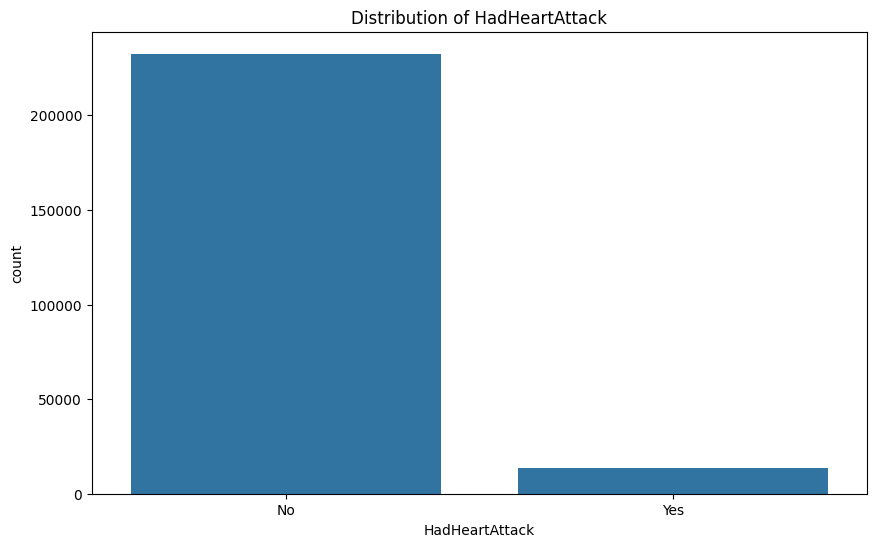

In [7]:
target = df['HadHeartAttack']
# check the distribution of the target variable
print(target.value_counts())
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=target)
plt.title('Distribution of HadHeartAttack')
plt.show()

### 2. Stacked Bar Chart
- Considering the target variable "HadHeartAttack".
- Each ratio is calculated by the proportion of "Yes" for each category.
- The higher the ratio, the more likely the independent variable leads to a heart attack.

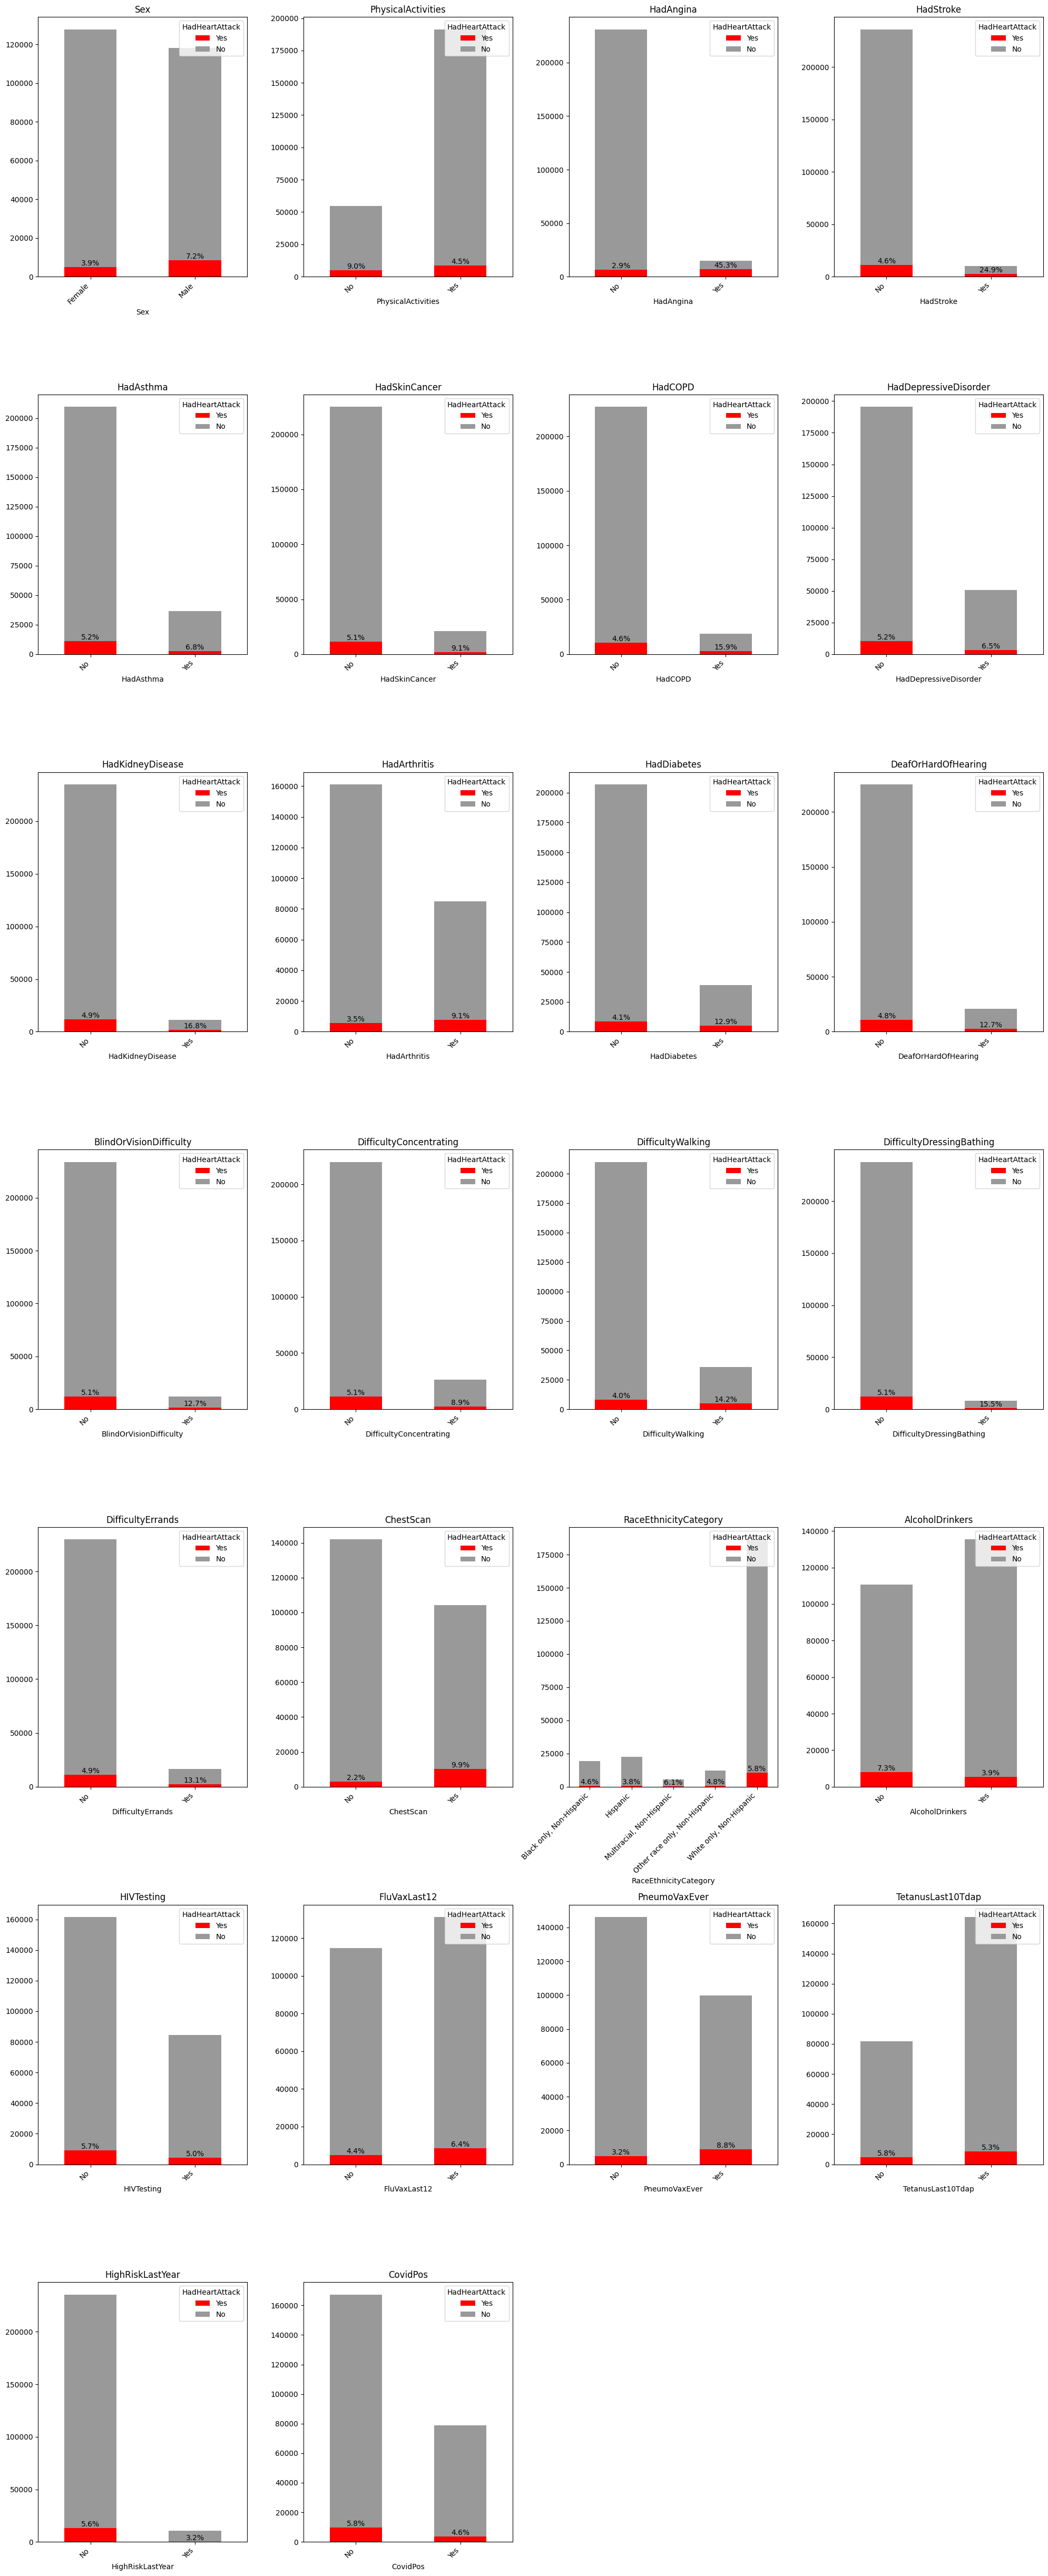

In [22]:
# Select object type columns excluding 'HadHeartAttack' and 'State'
object_columns= df.select_dtypes(include=['object']).columns
object_columns = object_columns.drop(['HadHeartAttack', 'State']) if 'HadHeartAttack' in object_columns and 'State' in object_columns else object_columns

# Determine the layout of the subplots
num_cols = 4  # Number of columns in the subplot grid
num_rows = (len(object_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(20, num_rows * 7))  # Increased figure size for better readability

for i, col in enumerate(object_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create a cross-tabulation of the current column and HadHeartAttack with counts
    cross_tab = pd.crosstab(df[col], df['HadHeartAttack'])
    
    # Reorder columns to have 'Yes' on top
    cross_tab = cross_tab[['Yes', 'No']]
    
    # Plot stacked bar chart with custom colors
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', '#999'])
    
    # Calculate and display the percentage of "Yes" for HadHeartAttack
    if 'Yes' in cross_tab.columns:
        yes_counts = cross_tab['Yes']
        total_counts = cross_tab.sum(axis=1)
        proportions = yes_counts / total_counts
        for idx, (count, prop) in enumerate(zip(yes_counts, proportions)):
            plt.text(idx, count, f'{prop:.1%}', ha='center', va='bottom')
    
    plt.title(col)
    plt.legend(title='HadHeartAttack', loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

### 3. Stacked Histogram

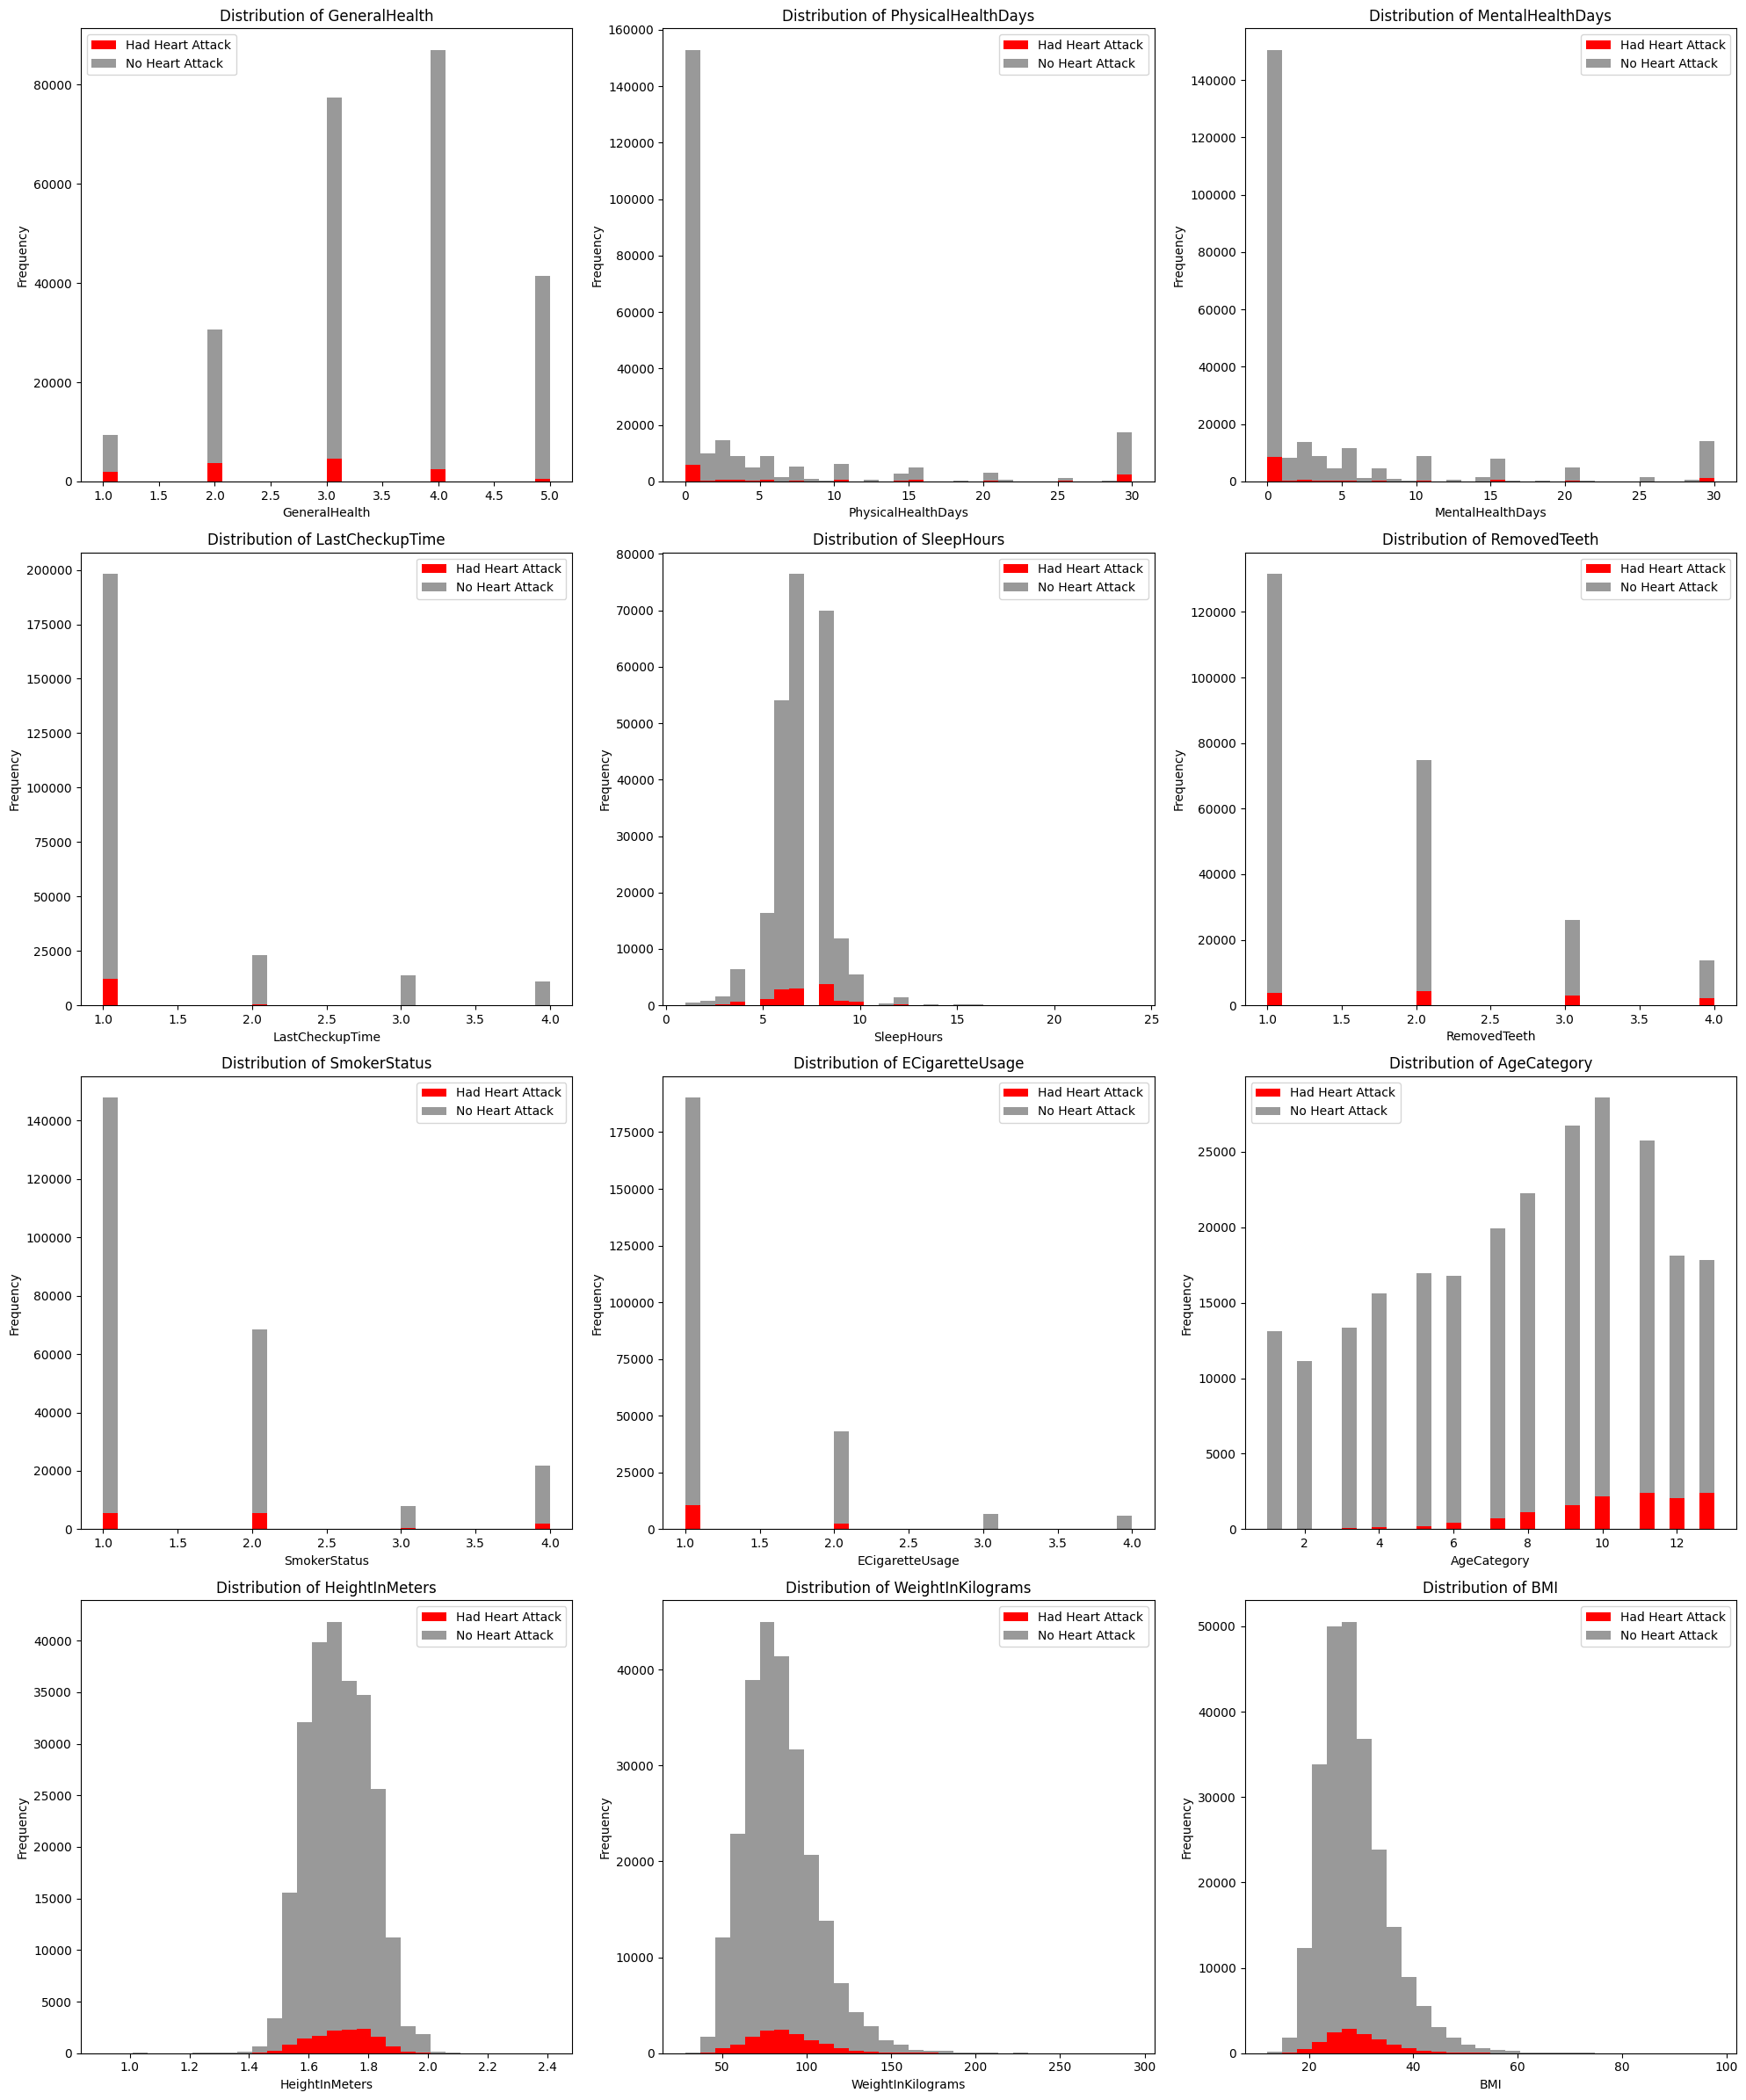

In [23]:
# Select numerical columns excluding 'HadHeartAttack'
numerical_columns= df.select_dtypes(include=['int64', 'float64']).columns
if 'HadHeartAttack' in numerical_columns:
    numerical_columns = numerical_columns.drop('HadHeartAttack')

# Determine the layout of the subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(20, num_rows * 6))  # Adjust figure size for better readability

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create stacked histogram
    plt.hist([df[df['HadHeartAttack'] == 'Yes'][col], df[df['HadHeartAttack'] == 'No'][col]], 
             stacked=True, 
             label=['Had Heart Attack', 'No Heart Attack'],
             color=['red', '#999'],
             bins=30)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


### 4. Correlation Matrix

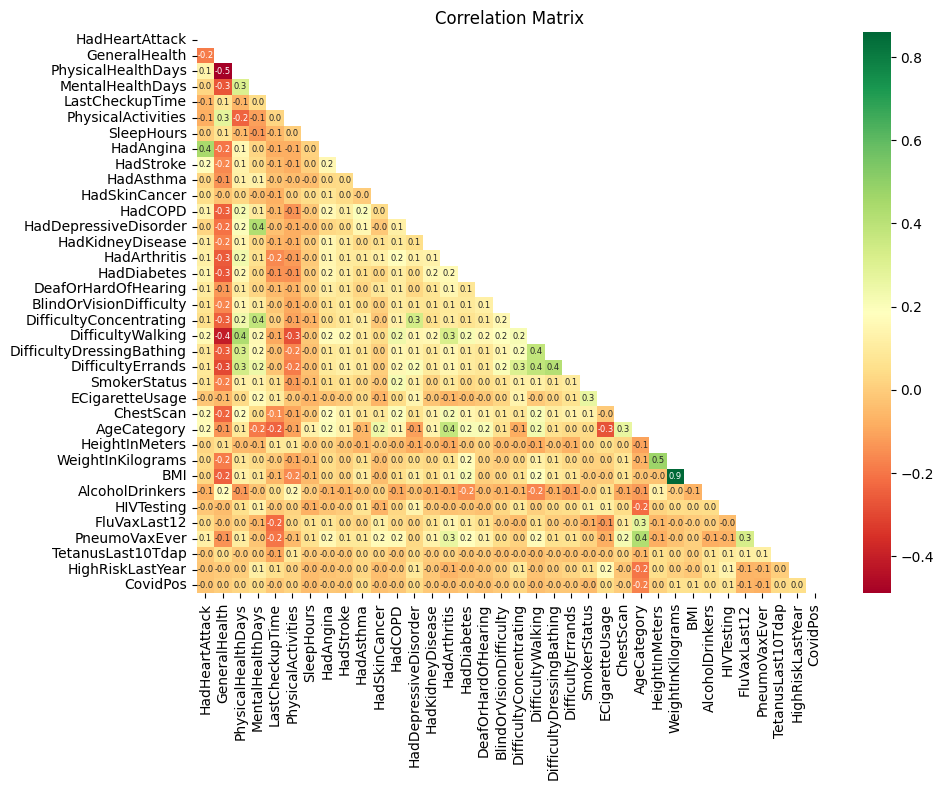

In [126]:
# show the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_num.corr()

# Reorder columns to put 'HadHeartAttack' first
columns = ['HadHeartAttack'] + [col for col in corr_matrix.columns if col != 'HadHeartAttack']
corr_matrix = corr_matrix.reindex(columns=columns, index=columns)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f', cmap='RdYlGn', annot_kws={'size': 6})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Feature Engineering

### 1. Feature Importance Based on Random Forest

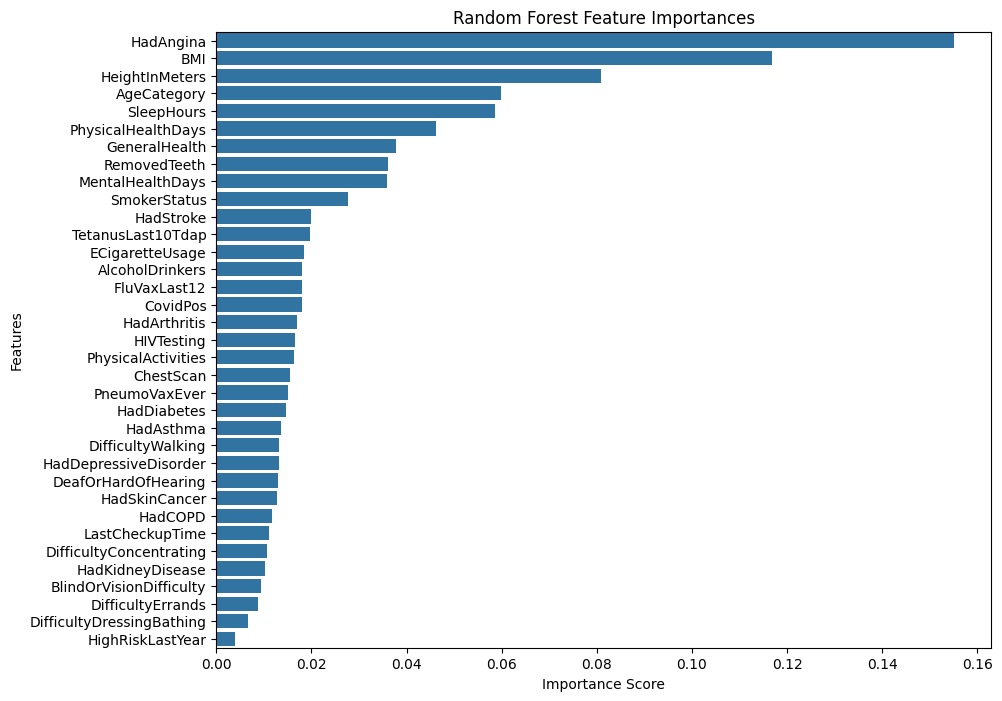

Top 20 features according to Random Forest: ['HadAngina', 'BMI', 'HeightInMeters', 'AgeCategory', 'SleepHours', 'PhysicalHealthDays', 'GeneralHealth', 'RemovedTeeth', 'MentalHealthDays', 'SmokerStatus', 'HadStroke', 'TetanusLast10Tdap', 'ECigaretteUsage', 'AlcoholDrinkers', 'FluVaxLast12', 'CovidPos', 'HadArthritis', 'HIVTesting', 'PhysicalActivities', 'ChestScan']


In [7]:
# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

# exclude columns that are not useful for the model
#  State, Sex and RaceEthnicityCategory can be used for resampling to mitigate biased data
#  HadHeartAttack is the target variable
#  WeightInKilograms has high correlation with BMI, so it is excluded.
excluded_columns = ['State', 'Sex', 'RaceEthnicityCategory', 'HadHeartAttack', 'WeightInKilograms']

# Define features and target
X = df_num[[col for col in df.columns if col not in excluded_columns]]
y = df_num['HadHeartAttack']

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Select top N features (e.g., top 20)
top_n = 20
top_features_rf = feature_importances.head(top_n).index.tolist()
print(f"Top {top_n} features according to Random Forest:", top_features_rf)

In [8]:
# select the top 20 features
df_selected = df_num[top_features_rf]
print(df_selected.info())
df_selected.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   HadAngina           246022 non-null  int64  
 1   BMI                 246022 non-null  float64
 2   HeightInMeters      246022 non-null  float64
 3   AgeCategory         246022 non-null  int64  
 4   SleepHours          246022 non-null  float64
 5   PhysicalHealthDays  246022 non-null  float64
 6   GeneralHealth       246022 non-null  int64  
 7   RemovedTeeth        246022 non-null  float64
 8   MentalHealthDays    246022 non-null  float64
 9   SmokerStatus        246022 non-null  int64  
 10  HadStroke           246022 non-null  int64  
 11  TetanusLast10Tdap   246022 non-null  int64  
 12  ECigaretteUsage     246022 non-null  int64  
 13  AlcoholDrinkers     246022 non-null  int64  
 14  FluVaxLast12        246022 non-null  int64  
 15  CovidPos            246022 non-nul

,HadAngina,BMI,HeightInMeters,AgeCategory,SleepHours,PhysicalHealthDays,GeneralHealth,RemovedTeeth,MentalHealthDays,SmokerStatus,HadStroke,TetanusLast10Tdap,ECigaretteUsage,AlcoholDrinkers,FluVaxLast12,CovidPos,HadArthritis,HIVTesting,PhysicalActivities,ChestScan
0,0,27.99,1.60,10,9.0,4.0,4,1.0,0.0,2,0,1,1,0,1,0,1,0,1,0
1,0,30.13,1.78,11,6.0,0.0,4,1.0,0.0,2,0,1,1,0,1,0,1,0,1,0
2,0,31.66,1.85,12,8.0,0.0,4,3.0,0.0,2,0,0,1,1,0,1,1,0,0,1
3,0,31.32,1.70,13,9.0,5.0,2,1.0,0.0,1,0,0,1,0,1,1,1,0,1,0
4,0,33.07,1.55,13,5.0,3.0,3,2.0,15.0,1,0,0,1,0,1,0,1,0,1,0


### 2. Convert Numerical Values to Categorical Values

                 BMI  HeightInMeters     SleepHours  PhysicalHealthDays  \
count  246022.000000   246022.000000  246022.000000       246022.000000   
mean       28.668136        1.705150       7.021331            4.119026   
std         6.513973        0.106654       1.440681            8.405844   
min        12.020000        0.910000       1.000000            0.000000   
25%        24.270000        1.630000       6.000000            0.000000   
50%        27.460000        1.700000       7.000000            0.000000   
75%        31.890000        1.780000       8.000000            3.000000   
max        97.650000        2.410000      24.000000           30.000000   

       MentalHealthDays  
count     246022.000000  
mean           4.167140  
std            8.102687  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            4.000000  
max           30.000000  


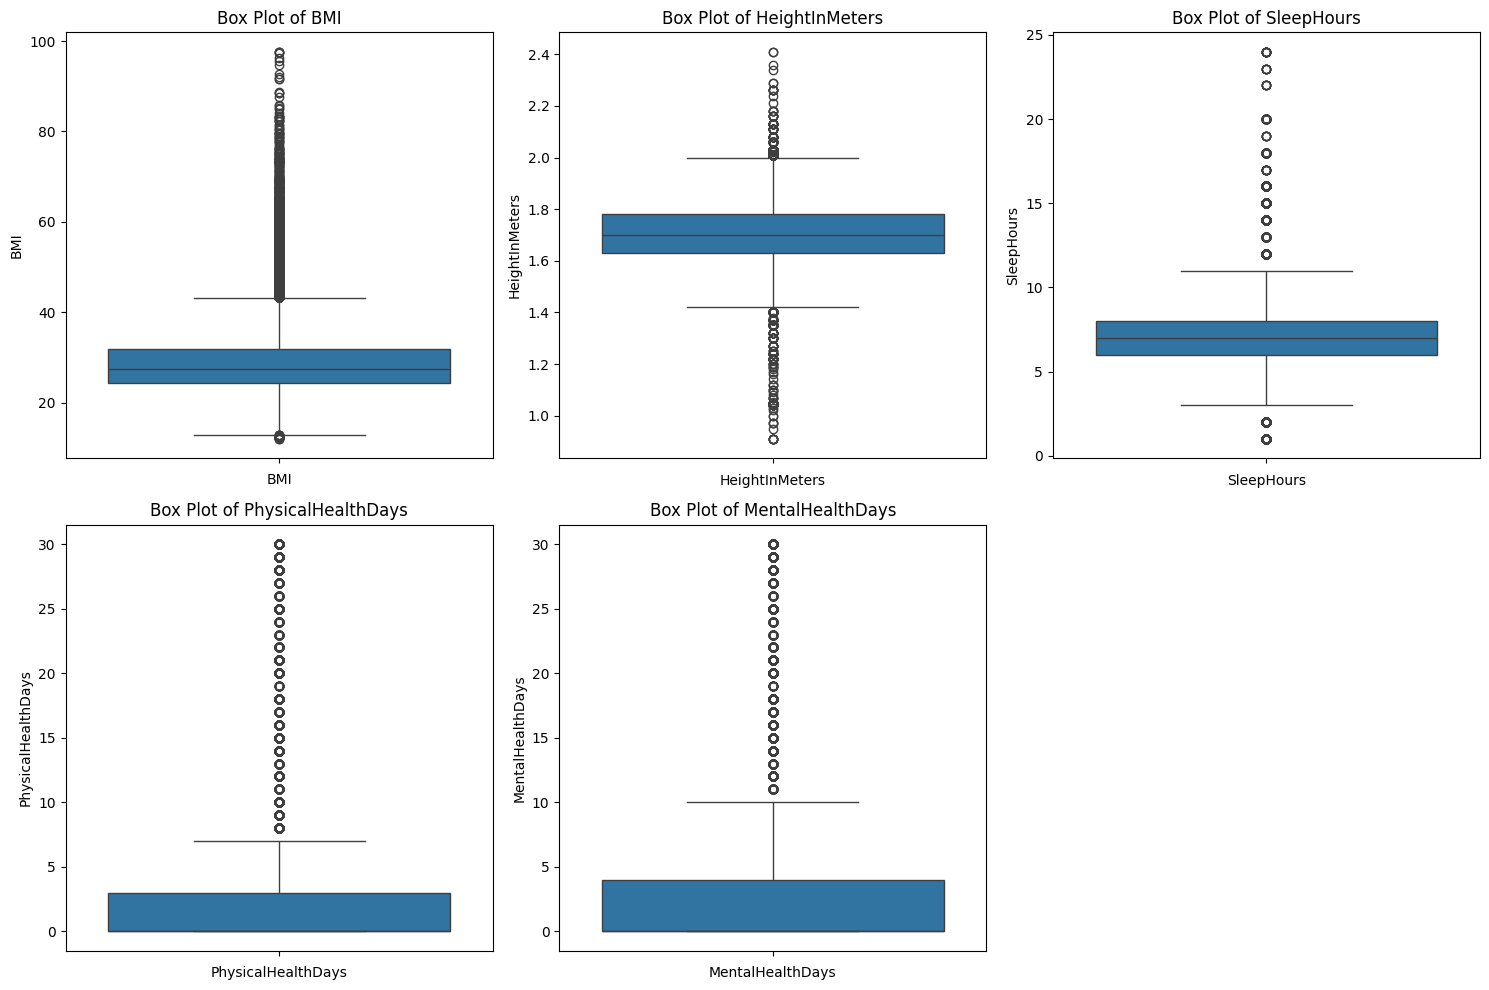

In [9]:
X = df_selected[['BMI', 'HeightInMeters', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']]
y = df['HadHeartAttack']

print(X.describe())

# Create box plots for each feature in X
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=X[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [10]:
# Categorization

# Define thresholds for categorization
bmi_thresholds = df_num[top_features_rf]['BMI'].quantile([0.25, 0.75])
height_thresholds = df_num[top_features_rf]['HeightInMeters'].quantile([0.25, 0.75])
sleep_hours_thresholds = df_num[top_features_rf]['SleepHours'].quantile([0.25, 0.75])
physical_health_days_thresholds = df_num[top_features_rf]['PhysicalHealthDays'].quantile([0, 1])
mental_health_days_thresholds = df_num[top_features_rf]['MentalHealthDays'].quantile([0, 1])


# Create a copy to avoid SettingWithCopyWarning
df_selected = df_num[top_features_rf].copy()

# Categorize BMI
df_selected.loc[:, 'BMI'] = pd.cut(
    df_selected['BMI'],
    bins=[-float('inf'), bmi_thresholds.iloc[0], bmi_thresholds.iloc[1], float('inf')],
    labels=['Low', 'Normal', 'High']
)

# Categorize HeightInMeters
df_selected.loc[:, 'HeightInMeters'] = pd.cut(
    df_selected['HeightInMeters'],
    bins=[-float('inf'), height_thresholds.iloc[0], height_thresholds.iloc[1], float('inf')],
    labels=['Small', 'Normal', 'Tall']
)

# Categorize SleepHours
df_selected.loc[:, 'SleepHours'] = pd.cut(
    df_selected['SleepHours'],
    bins=[-float('inf'), sleep_hours_thresholds.iloc[0], sleep_hours_thresholds.iloc[1], float('inf')],
    labels=['Short', 'Normal', 'Long']
)

# Categorize PhysicalHealthDays
df_selected.loc[:, 'PhysicalHealthDays'] = df_selected['PhysicalHealthDays'].apply(lambda x: 0 if x == 0 else 1)

# Categorize MentalHealthDays
df_selected.loc[:, 'MentalHealthDays'] = df_selected['MentalHealthDays'].apply(lambda x: 0 if x == 0 else 1)

# Categorize AgeCategory
df_selected.loc[:, 'AgeCategory'] = pd.cut(
    df_selected['AgeCategory'],
    bins=[0, 4, 9, float('inf')],
    labels=['Young', 'Middle', 'Senior']
)
# Categorize GeneralHealth
dict1_reverse = {5: 'Excellent', 4: 'Very good', 3: 'Good', 2: 'Fair', 1: 'Poor'}  # Reverse the mapping for GeneralHealth
df_selected.loc[:, 'GeneralHealth'] = df_selected['GeneralHealth'].map(dict1_reverse).fillna(df_selected['GeneralHealth'])


### Ordering Variables to categorical
# RemovedTeeth
df_selected.loc[:, 'RemovedTeeth'] = df_selected['RemovedTeeth'].apply(lambda x: 'No' if x == 1 else 'Yes')
# SmokerStatus
df_selected.loc[:, 'SmokerStatus'] = df_selected['SmokerStatus'].apply(lambda x: 'No' if x == 1 else 'Yes')
# ECigaretteUsage
df_selected.loc[:, 'ECigaretteUsage'] = df_selected['ECigaretteUsage'].apply(lambda x: 'No' if x == 1 else 'Yes')
# 

df_selected.head()


/var/folders/94/tj1gqv8s2nn5mbnb9k35_gvc0000gn/T/ipykernel_46185/3231599775.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Normal', 'Normal', 'Normal', 'Normal', 'High', ..., 'High', 'Normal', 'Normal', 'Normal', 'High']
Length: 246022
Categories (3, object): ['Low' < 'Normal' < 'High']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_selected.loc[:, 'BMI'] = pd.cut(
/var/folders/94/tj1gqv8s2nn5mbnb9k35_gvc0000gn/T/ipykernel_46185/3231599775.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Small', 'Normal', 'Tall', 'Normal', 'Small', ..., 'Normal', 'Tall', 'Normal', 'Normal', 'Tall']
Length: 246022
Categories (3, object): ['Small' < 'Normal' < 'Tall']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_selected.loc[:, 'HeightInMeters'] = pd.cu

,HadAngina,BMI,HeightInMeters,AgeCategory,SleepHours,PhysicalHealthDays,GeneralHealth,RemovedTeeth,MentalHealthDays,SmokerStatus,HadStroke,TetanusLast10Tdap,ECigaretteUsage,AlcoholDrinkers,FluVaxLast12,CovidPos,HadArthritis,HIVTesting,PhysicalActivities,ChestScan
0,0,Normal,Small,Senior,Long,1.0,Very good,No,0.0,Yes,0,1,No,0,1,0,1,0,1,0
1,0,Normal,Normal,Senior,Short,0.0,Very good,No,0.0,Yes,0,1,No,0,1,0,1,0,1,0
2,0,Normal,Tall,Senior,Normal,0.0,Very good,Yes,0.0,Yes,0,0,No,1,0,1,1,0,0,1
3,0,Normal,Normal,Senior,Long,1.0,Fair,No,0.0,No,0,0,No,0,1,1,1,0,1,0
4,0,High,Small,Senior,Short,1.0,Good,Yes,1.0,No,0,0,No,0,1,0,1,0,1,0


Selected object columns (excluding 'HadHeartAttack'):
['HadAngina', 'BMI', 'HeightInMeters', 'AgeCategory', 'SleepHours', 'PhysicalHealthDays', 'GeneralHealth', 'RemovedTeeth', 'MentalHealthDays', 'SmokerStatus', 'HadStroke', 'TetanusLast10Tdap', 'ECigaretteUsage', 'AlcoholDrinkers', 'FluVaxLast12', 'CovidPos', 'HadArthritis', 'HIVTesting', 'PhysicalActivities', 'ChestScan']


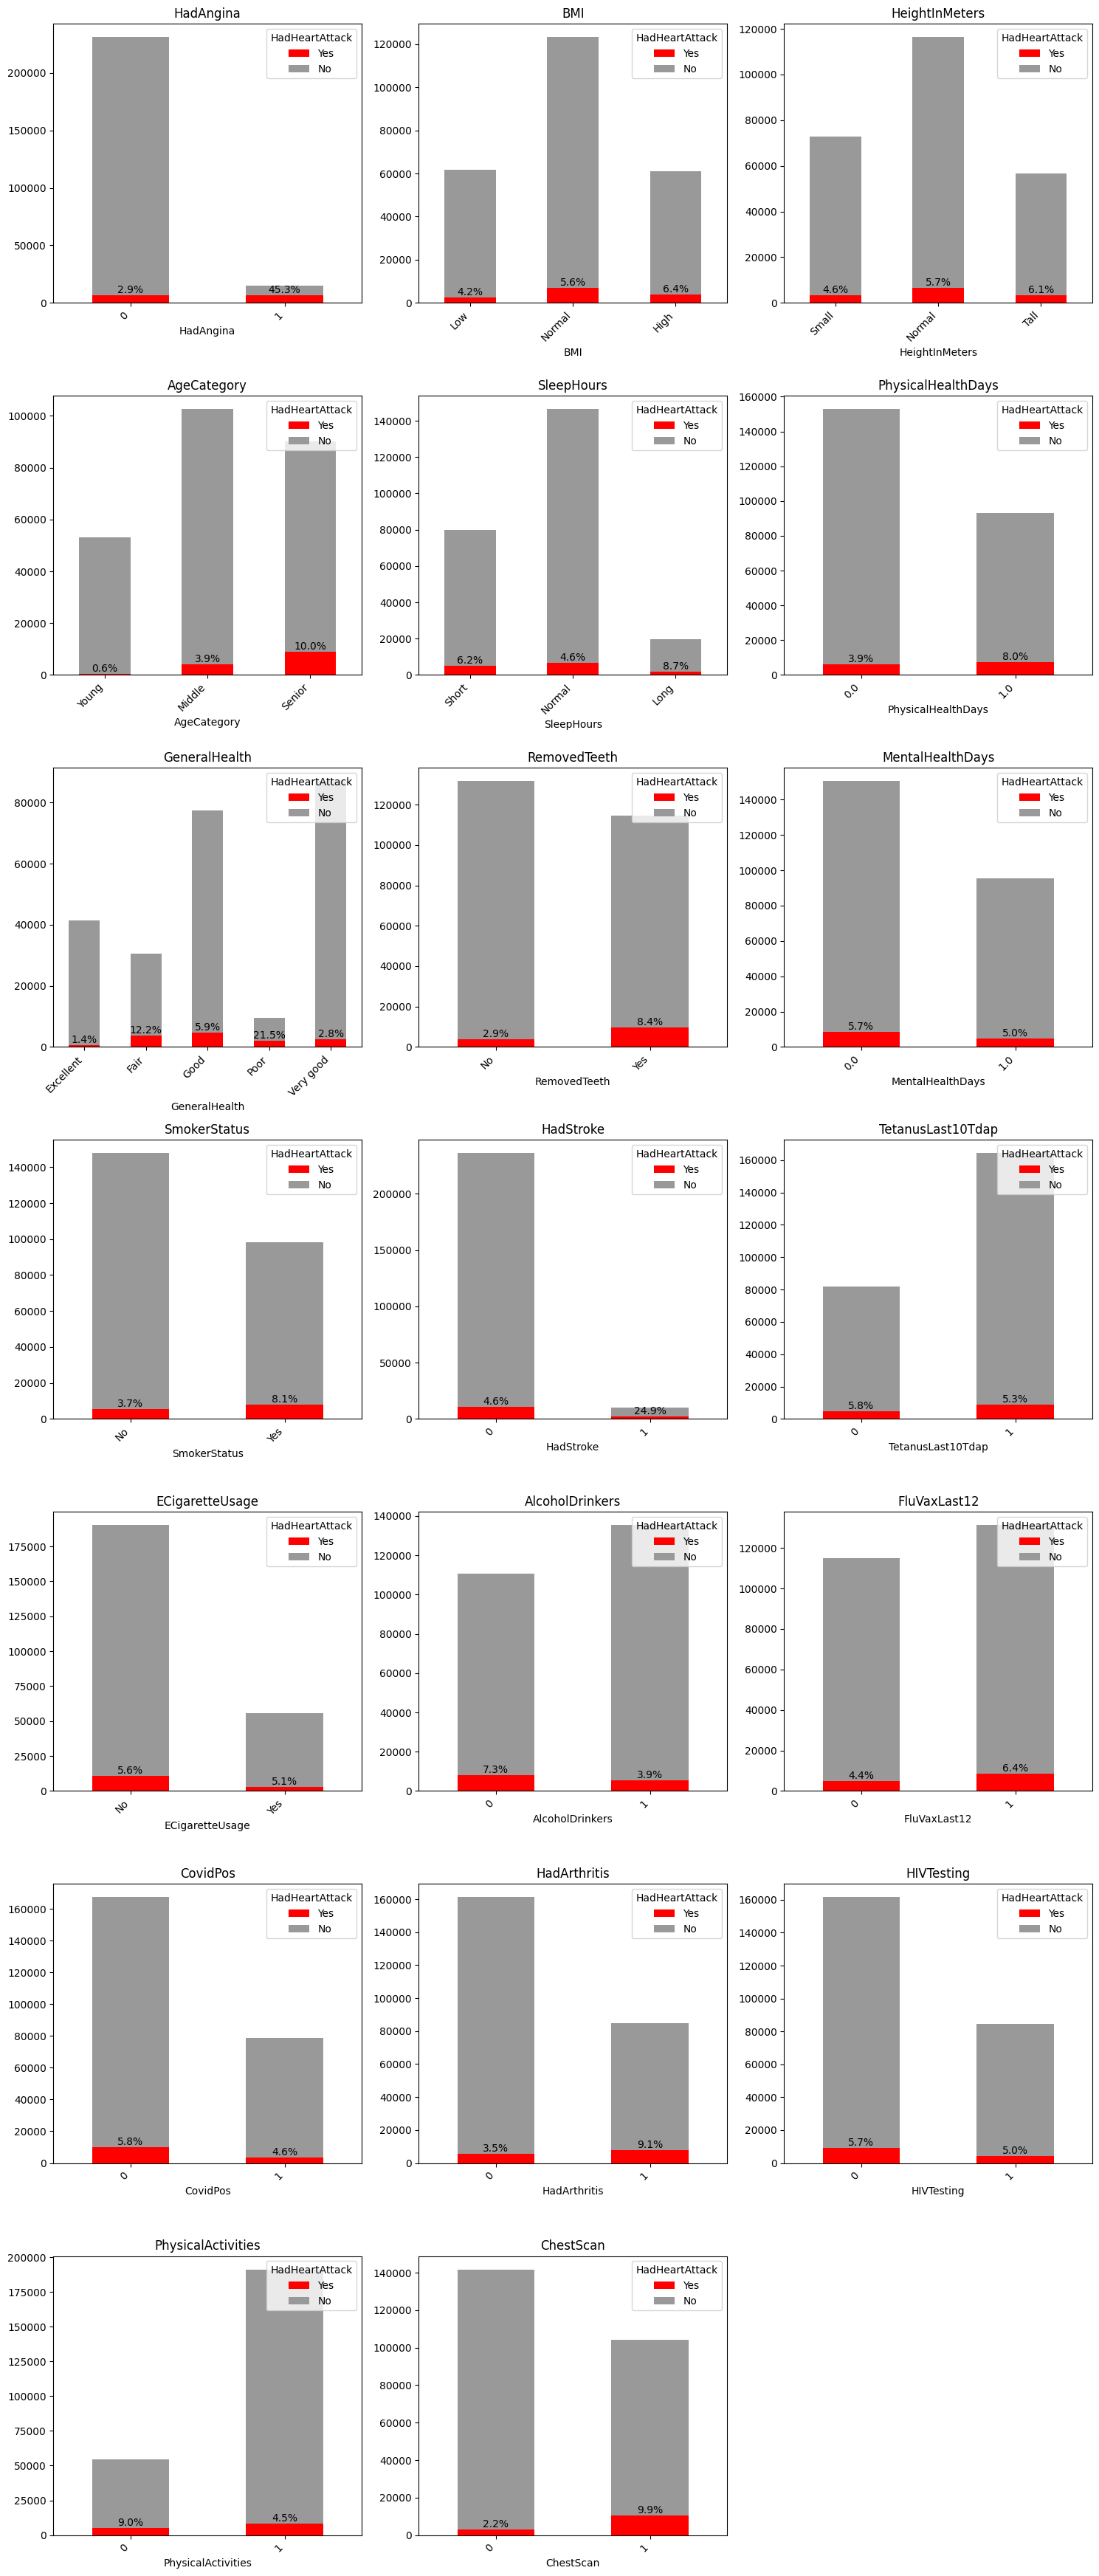

In [11]:
# Select object type columns excluding 'HadHeartAttack'
feature_columns = [col for col in df_selected.columns if col != 'HadHeartAttack']

# Display the selected columns
print("Selected object columns (excluding 'HadHeartAttack'):")
print(feature_columns)

# Determine the layout of the subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(feature_columns) + num_cols - 1) // num_cols  # Calculate required rows

plt.figure(figsize=(15, num_rows * 5))  # Increased figure size for better readability

for i, col in enumerate(feature_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Create a cross-tabulation of the current column and HadHeartAttack with counts
    cross_tab = pd.crosstab(df_selected[col], df['HadHeartAttack'])
    
    # Reorder columns to have 'Yes' on top
    cross_tab = cross_tab[['Yes', 'No']] if 'Yes' in cross_tab.columns else cross_tab
    
    # Plot stacked bar chart with custom colors
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', '#999'])
    
    # Calculate and display the percentage of "Yes" for HadHeartAttack
    if 'Yes' in cross_tab.columns:
        yes_counts = cross_tab['Yes']
        total_counts = cross_tab.sum(axis=1)
        proportions = yes_counts / total_counts
        for idx, (count, prop) in enumerate(zip(yes_counts, proportions)):
            plt.text(idx, count, f'{prop:.1%}', ha='center', va='bottom')
    
    plt.title(col)
    plt.legend(title='HadHeartAttack', loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()


### 3. Apply One-Hot Encoding


In [12]:
# Apply one-hot encoding to the categorical columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Identify categorical columns
categorical_columns = df_selected.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify binary and multi-category categorical columns
binary_columns = [col for col in categorical_columns if df_selected[col].nunique() == 2]
multi_category_columns = [col for col in categorical_columns if df_selected[col].nunique() > 2]

# Define a transformer to map binary categorical variables to 0 and 1
def map_binary(x):
    return x.replace({'No': 0, 'Yes': 1})

binary_transformer = FunctionTransformer(map_binary, validate=False)

# Define OneHotEncoder for multi-category categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_columns),
        ('onehot', onehot_encoder, multi_category_columns)
    ],
    remainder='passthrough'
)

# Apply the transformations to the data
df_encoded = preprocessor.fit_transform(df_selected)

# Get the names of the new one-hot encoded columns
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(multi_category_columns)

# Combine binary column names and one-hot encoded column names
encoded_columns = binary_columns + list(onehot_feature_names)

# Add remaining non-categorical columns
non_categorical_columns = [col for col in df_selected.columns if col not in categorical_columns]
encoded_columns += non_categorical_columns

# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)

# Add the target variable to the dataframe
df_encoded['HadHeartAttack'] = df_num['HadHeartAttack']

df_encoded.head()

/var/folders/94/tj1gqv8s2nn5mbnb9k35_gvc0000gn/T/ipykernel_46185/2910243330.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return x.replace({'No': 0, 'Yes': 1})


,RemovedTeeth,SmokerStatus,ECigaretteUsage,BMI_High,BMI_Low,BMI_Normal,HeightInMeters_Normal,HeightInMeters_Small,HeightInMeters_Tall,AgeCategory_Middle,...,HadStroke,TetanusLast10Tdap,AlcoholDrinkers,FluVaxLast12,CovidPos,HadArthritis,HIVTesting,PhysicalActivities,ChestScan,HadHeartAttack
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


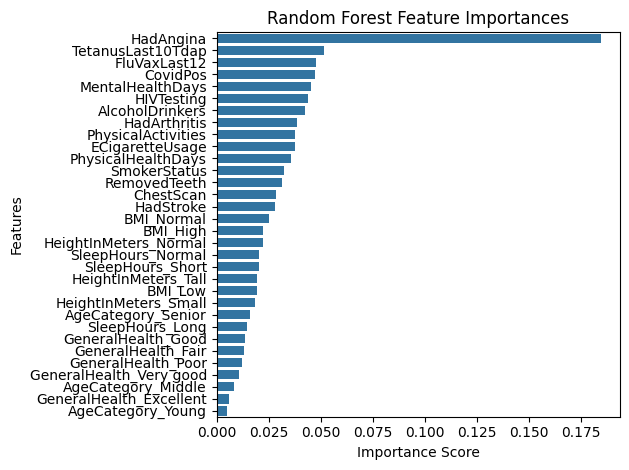

Feature Importances:
HadAngina                  0.184556
TetanusLast10Tdap          0.051590
FluVaxLast12               0.047964
CovidPos                   0.047268
MentalHealthDays           0.045227
HIVTesting                 0.044044
AlcoholDrinkers            0.042248
HadArthritis               0.038563
PhysicalActivities         0.037675
ECigaretteUsage            0.037670
PhysicalHealthDays         0.035803
SmokerStatus               0.032208
RemovedTeeth               0.031460
ChestScan                  0.028732
HadStroke                  0.027913
BMI_Normal                 0.024986
BMI_High                   0.022486
HeightInMeters_Normal      0.022259
SleepHours_Normal          0.020566
SleepHours_Short           0.020498
HeightInMeters_Tall        0.019369
BMI_Low                    0.019368
HeightInMeters_Small       0.018278
AgeCategory_Senior         0.015937
SleepHours_Long            0.014706
GeneralHealth_Good         0.013545
GeneralHealth_Fair         0.013280
General

In [13]:
# Define features and target from df_encoded
X = df_encoded.drop('HadHeartAttack', axis=1)
y = df_encoded['HadHeartAttack']

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Display feature importances
print("Feature Importances:")
print(feature_importances)

## Predictive Analysis


In [14]:
# check imbalanced target variable
print(df_encoded['HadHeartAttack'].value_counts())
print("")
print(df_encoded.info())
df_encoded.head()

HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RemovedTeeth             246022 non-null  float64
 1   SmokerStatus             246022 non-null  float64
 2   ECigaretteUsage          246022 non-null  float64
 3   BMI_High                 246022 non-null  float64
 4   BMI_Low                  246022 non-null  float64
 5   BMI_Normal               246022 non-null  float64
 6   HeightInMeters_Normal    246022 non-null  float64
 7   HeightInMeters_Small     246022 non-null  float64
 8   HeightInMeters_Tall      246022 non-null  float64
 9   AgeCategory_Middle       246022 non-null  float64
 10  AgeCategory_Senior       246022 non-null  float64
 11  AgeCategory_Young        246022 non-null  float64
 12  SleepHours_Long          246022 non-null  float6

,RemovedTeeth,SmokerStatus,ECigaretteUsage,BMI_High,BMI_Low,BMI_Normal,HeightInMeters_Normal,HeightInMeters_Small,HeightInMeters_Tall,AgeCategory_Middle,...,HadStroke,TetanusLast10Tdap,AlcoholDrinkers,FluVaxLast12,CovidPos,HadArthritis,HIVTesting,PhysicalActivities,ChestScan,HadHeartAttack
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


### 1. Resampling

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Function to create balanced datasets
def create_balanced_datasets(df, n_splits=10, test_size=0.2, random_state=42):
    datasets = []
    
    X = df.drop('HadHeartAttack', axis=1)
    y = df['HadHeartAttack']
    
    for i in range(n_splits):
        # Initialize RandomUnderSampler with a different random_state for each split
        rus = RandomUnderSampler(sampling_strategy='auto', random_state=random_state + i)
        
        # Resample the entire dataset to balance classes
        X_resampled, y_resampled = rus.fit_resample(X, y)
        
        df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
        
        # Ensure that both classes are present after resampling
        if df_balanced['HadHeartAttack'].nunique() < 2:
            print(f"Skipping split {i+1} as it resulted in a single class.")
            continue
        
        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled, 
            y_resampled,
            test_size=test_size, 
            stratify=y_resampled, 
            random_state=random_state + i
        )
        
        datasets.append({'train_X': X_train, 'test_X': X_test, 'train_y': y_train, 'test_y': y_test})
    
    return datasets

# Create 10 pairs of balanced datasets
balanced_datasets = create_balanced_datasets(df_encoded, n_splits=10)

# Print information about the datasets
for i, data_dict in enumerate(balanced_datasets):
    print(f"Dataset pair {i+1}:")
    print(f"  Training set shape: {data_dict['train_X'].shape}")
    print(f"  Test set shape: {data_dict['test_X'].shape}")
    print(f"  Training set target distribution:\n{data_dict['train_y'].value_counts()}")
    print(f"  Test set target distribution:\n{data_dict['test_y'].value_counts()}")
    print()

Dataset pair 1:
  Training set shape: (21496, 32)
  Test set shape: (5374, 32)
  Training set target distribution:
HadHeartAttack
0    10748
1    10748
Name: count, dtype: int64
  Test set target distribution:
HadHeartAttack
1    2687
0    2687
Name: count, dtype: int64

Dataset pair 2:
  Training set shape: (21496, 32)
  Test set shape: (5374, 32)
  Training set target distribution:
HadHeartAttack
0    10748
1    10748
Name: count, dtype: int64
  Test set target distribution:
HadHeartAttack
0    2687
1    2687
Name: count, dtype: int64

Dataset pair 3:
  Training set shape: (21496, 32)
  Test set shape: (5374, 32)
  Training set target distribution:
HadHeartAttack
0    10748
1    10748
Name: count, dtype: int64
  Test set target distribution:
HadHeartAttack
0    2687
1    2687
Name: count, dtype: int64

Dataset pair 4:
  Training set shape: (21496, 32)
  Test set shape: (5374, 32)
  Training set target distribution:
HadHeartAttack
0    10748
1    10748
Name: count, dtype: int64
  Test

### 2. Random Forest

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Function to evaluate metrics
def evaluate_model(y_true, y_pred):
    """
    Evaluate the model performance and return relevant metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    return accuracy, precision, recall, f1

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each of the 10 balanced dataset pairs
for i, dataset in enumerate(balanced_datasets, 1):
    print(f"Processing Dataset Pair {i}...") # Suppress intermediate print statemetns
    
    # Extract training and testing data
    X_train = dataset['train_X']
    y_train = dataset['train_y']
    X_test = dataset['test_X']
    y_test = dataset['test_y']
    
    # Initialize the Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf.predict(X_test)
    
    # Evaluate the predictions
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    
    # Append the metrics to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

# Print the overall metrics summary
print("Overall Metrics Summary:")
print(metrics_df.describe())

Processing Dataset Pair 1...
Processing Dataset Pair 2...
Processing Dataset Pair 3...
Processing Dataset Pair 4...
Processing Dataset Pair 5...
Processing Dataset Pair 6...
Processing Dataset Pair 7...
Processing Dataset Pair 8...
Processing Dataset Pair 9...
Processing Dataset Pair 10...
Overall Metrics Summary:
        Accuracy  Precision     Recall   F1-Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.777931   0.782624   0.769743   0.776110
std     0.007033   0.009202   0.006133   0.006566
min     0.770190   0.772727   0.759955   0.769116
25%     0.774284   0.777722   0.766561   0.772292
50%     0.777168   0.781913   0.767771   0.774927
75%     0.778843   0.784637   0.773632   0.777718
max     0.796055   0.805609   0.780424   0.792817


### Neural Network

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import ParameterGrid

# 1. Define the Custom Dataset Class
class HeartDiseaseDataset(Dataset):
    def __init__(self, X, y):
        """
        Initializes the dataset with features and labels.

        Args:
            X (pd.DataFrame): Feature dataframe.
            y (pd.Series): Target series.
        """
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # For binary classification

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 2. Define the Neural Network Architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes=[64, 32], dropout_prob=0.5):
        """
        Initializes the neural network layers.

        Args:
            input_size (int): Number of input features.
            hidden_sizes (list): List containing the number of neurons in each hidden layer.
            dropout_prob (float): Dropout probability for regularization.
        """
        super(NeuralNetwork, self).__init__()
        layers = []
        last_size = input_size

        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(last_size, hidden_size))
            layers.append(nn.ReLU())  # Activation Function
            layers.append(nn.Dropout(dropout_prob))
            last_size = hidden_size

        layers.append(nn.Linear(last_size, 1))  # Output layer
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# 3. Define Training and Evaluation Functions
def train_model(model, dataloader, criterion, optimizer, device):
    """
    Trains the model for one epoch.

    Args:
        model (nn.Module): The neural network model.
        dataloader (DataLoader): DataLoader for training data.
        criterion (loss): Loss function.
        optimizer (optimizer): Optimizer.
        device (torch.device): Device to train on.

    Returns:
        float: Average training loss.
    """
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(dataloader.dataset)
    return epoch_loss

def evaluate_model(model, dataloader, criterion, device):
    """
    Evaluates the model on validation/test data.

    Args:
        model (nn.Module): The neural network model.
        dataloader (DataLoader): DataLoader for validation/test data.
        criterion (loss): Loss function.
        device (torch.device): Device to evaluate on.

    Returns:
        float: Average validation/test loss.
        np.array: Predictions.
        np.array: True labels.
    """
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * X_batch.size(0)
            preds = (outputs >= 0.5).float()
            all_preds.append(preds.cpu().numpy())
            all_labels.append(y_batch.cpu().numpy())

    epoch_loss = running_loss / len(dataloader.dataset)
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)
    return epoch_loss, all_preds, all_labels

# 4. Define Hyperparameter Tuning Grid
param_grid = {
    'hidden_sizes': [[32, 16]],  # tested [[32, 16], [64, 32]]
    'dropout_prob': [0.2],       # tested [0.2, 0.5]
    'learning_rate': [0.001],    # tested [0.001, 0.01]
    'batch_size': [16],          # tested [16, 32]
    'epochs': [25]
}

grid = list(ParameterGrid(param_grid))

# 5. Set Up Device
# Updated to use MPS for Apple Silicon if available
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using device: MPS")
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using device: CUDA")
else:
    device = torch.device('cpu')
    print("Using device: CPU")

# 6. Define Experiment Function with Hyperparameter Tuning
def run_experiment(train_df, test_df, param_grid, device, patience=5):
    """
    Trains and evaluates the neural network with different hyperparameters.

    Args:
        train_df (pd.DataFrame): Training data with target.
        test_df (pd.DataFrame): Testing data with target.
        param_grid (list): List of hyperparameter combinations.
        device (torch.device): Device to train on.

    Returns:
        dict: Best metrics and corresponding hyperparameters.
    """
    X_train, y_train = train_df.drop('HadHeartAttack', axis=1), train_df['HadHeartAttack']
    X_test, y_test = test_df.drop('HadHeartAttack', axis=1), test_df['HadHeartAttack']

    dataset_train = HeartDiseaseDataset(X_train, y_train)
    dataset_test = HeartDiseaseDataset(X_test, y_test)

    best_f1 = 0
    best_params = None
    best_metrics = {}

    for params in param_grid:
        # Initialize DataLoaders
        train_loader = DataLoader(dataset_train, batch_size=params['batch_size'], shuffle=True)
        test_loader = DataLoader(dataset_test, batch_size=params['batch_size'], shuffle=False)

        # Initialize the model
        model = NeuralNetwork(input_size=X_train.shape[1],
                              hidden_sizes=params['hidden_sizes'],
                              dropout_prob=params['dropout_prob']).to(device)

        # Define loss and optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

        # Training loop with Early Stopping
        best_val_loss = float('inf')
        epochs_no_improve = 0

        for epoch in range(params['epochs']):
            train_loss = train_model(model, train_loader, criterion, optimizer, device)
            
            # Evaluate on validation set
            val_loss, _, _ = evaluate_model(model, test_loader, criterion, device)
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
            
            if epochs_no_improve >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Evaluation
        test_loss, preds, labels = evaluate_model(model, test_loader, criterion, device)
        f1 = f1_score(labels, preds)

        if f1 > best_f1:
            best_f1 = f1
            best_params = params
            accuracy = accuracy_score(labels, preds)
            precision = precision_score(labels, preds, zero_division=0)
            recall = recall_score(labels, preds, zero_division=0)
            best_metrics = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            }

    return best_metrics, best_params

# 7. Iterate Over Each of the 10 Balanced Dataset Pairs and Apply Neural Network
# Initialize list to store overall metrics
overall_metrics = []

for i, dataset in enumerate(balanced_datasets, 1):
    print(f"Processing Dataset Pair {i}...")
    train_df, test_df = dataset['train_X'], dataset['test_X']
    train_y, test_y = dataset['train_y'], dataset['test_y']

    # Combine X and y for easier handling
    train_combined = pd.concat([train_df.reset_index(drop=True), train_y.reset_index(drop=True)], axis=1)
    test_combined = pd.concat([test_df.reset_index(drop=True), test_y.reset_index(drop=True)], axis=1)

    # Run experiment with hyperparameter tuning
    metrics, params = run_experiment(train_combined, test_combined, grid, device)

    print(f"Best Metrics for Dataset Pair {i}:")
    print(metrics)
    print("Best Hyperparameters:")
    print(params)
    print("-" * 50)

    overall_metrics.append(metrics)

# 8. Convert Overall Metrics to DataFrame for Summary
metrics_df = pd.DataFrame(overall_metrics)
print("Model Performance Across 10 Folds:")
print(metrics_df.describe())

# If you wish to collect and print metric summaries
print("\nDetailed Metrics for Each Fold:")
for idx, metrics in enumerate(overall_metrics, 1):
    print(f"Fold {idx}: {metrics}")

print("\nOverall Metrics Summary:")
print(metrics_df.describe())

Using device: MPS
Processing Dataset Pair 1...
Early stopping at epoch 11
Best Metrics for Dataset Pair 1:
{'Accuracy': 0.7897283215481951, 'Precision': np.float64(0.8095427435387674), 'Recall': np.float64(0.757722366951991), 'F1-Score': np.float64(0.7827758554402153)}
Best Hyperparameters:
{'batch_size': 16, 'dropout_prob': 0.2, 'epochs': 25, 'hidden_sizes': [32, 16], 'learning_rate': 0.001}
--------------------------------------------------
Processing Dataset Pair 2...
Early stopping at epoch 10
Best Metrics for Dataset Pair 2:
{'Accuracy': 0.7858206177893562, 'Precision': np.float64(0.781112737920937), 'Recall': np.float64(0.7941942687011537), 'F1-Score': np.float64(0.7875991880420742)}
Best Hyperparameters:
{'batch_size': 16, 'dropout_prob': 0.2, 'epochs': 25, 'hidden_sizes': [32, 16], 'learning_rate': 0.001}
--------------------------------------------------
Processing Dataset Pair 3...
Early stopping at epoch 11
Best Metrics for Dataset Pair 3:
{'Accuracy': 0.7941942687011537, 'P